## Условие задачи 1

Посредством II закона Ньютона можно вывести, что скорость парашютиста находится по формуле $v = \frac{gm}{c}(1 − e^{−\frac{c}{m}t})$. Найдите, пользуясь методом дихотомии, regula falsi и модифицированным regula falsi коэффициент лобового сопротивления $c$, который позволит парашютисту массой $m = 68.1kg$, иметь скорость $v = 40m/s$ после свободного падения $t = 10s$ (пусть $g = 9.8m/s^2$). Сравнить методы

Перепишем уравнение в более удобной для понимания форме:

$$
\frac{gm}{c}(1 − e^{−\frac{c}{m}t}) - v = 0
$$

Теперь понятно, что мы ищем - точку пересечению оси $Ox$.

$x = 0$ - асимптота гиперболы

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from root_finding.function import Function
from root_finding.solvers import DichotomySolver, RegulaFalsiSolver, RegulaFalsiModifiedSolver, NewtonSolver, SecantSolver, SteffensensSolver

In [4]:
m = 68.1
v = 40
t = 10
g = 9.8

## Сравнение методов Дихотомии, Regula Falsi, Regula Falsi Modified

In [5]:
def test_methods(y: Function, a, b, eps):
    xs_showcase = np.arange(a, b, eps)
    ys_showcase = y(xs_showcase)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.axhline(y=0, lw=1, color='k')
    plt.axvline(x=0, lw=1, color='k')
    plt.title(rf"{y.name}")
    plt.plot(xs_showcase, ys_showcase)
    plt.grid(True)
    plt.show()

    dichotomy_result = DichotomySolver(y, eps).solve(a, b)
    regula_falsi_result = RegulaFalsiSolver(y, eps).solve(a, b)
    regula_falsi_modified_result = RegulaFalsiModifiedSolver(y, eps).solve(a, b)

    print(f"Корень = {dichotomy_result.root} - метод дихотомии")
    print(f"Корень = {regula_falsi_result.root} - regula falsi")
    print(f"Корень = {regula_falsi_modified_result.root} - regula falsi modified")

    print()

    print(f"Количество итераций = {dichotomy_result.iterations} - метод дихотомии")
    print(f"Количество итераций = {regula_falsi_result.iterations} - regula falsi")
    print(f"Количество итераций = {regula_falsi_modified_result.iterations} - regula falsi modified")


    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    axes[0].set_title(rf'Residuals for {y.name} (linear scale)')
    axes[0].plot(dichotomy_result.times, dichotomy_result.residuals, color='blue', label='Dichotomy')
    axes[0].plot(regula_falsi_result.times, regula_falsi_result.residuals, color='red', label='Regula Falsi')
    axes[0].plot(regula_falsi_modified_result.times, regula_falsi_modified_result.residuals, color='orange', label='Regula Falsi Modified')
    axes[0].set_xlabel("Time, sec")
    axes[0].set_ylabel("|y(x)|")
    axes[0].legend()
    axes[0].grid(True)
    axes[1].set_title(rf"Residuals for {y.name} (log-log scale)")
    axes[1].plot(dichotomy_result.times, dichotomy_result.residuals, color='blue')
    axes[1].plot(regula_falsi_result.times, regula_falsi_result.residuals, color='red')
    axes[1].plot(regula_falsi_modified_result.times, regula_falsi_modified_result.residuals, color='orange')
    axes[1].set_xlabel("Time, sec (log)")
    axes[1].set_ylabel("|y(x)| (log)")
    axes[1].set_xscale('log')
    axes[1].set_yscale('log')
    axes[1].grid(True, which='both')
    plt.tight_layout()
    plt.show()

    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    axes[0].set_title(rf"Convergence (Dichotomy) for {y.name}")
    axes[0].set_xlabel('x')
    axes[0].set_ylabel('y')
    axes[0].axhline(y=0, lw=1, color='k')
    axes[0].axvline(x=0, lw=1, color='k')
    axes[0].plot(xs_showcase, ys_showcase)
    axes[0].scatter(dichotomy_result.approximations, [y(x) for x in dichotomy_result.approximations], color='red')
    axes[0].grid(True)
    axes[1].set_title(rf"Convergence (Regula Falsi) for {y.name}")
    axes[1].set_xlabel('x')
    axes[1].set_ylabel('y')
    axes[1].axhline(y=0, lw=1, color='k')
    axes[1].axvline(x=0, lw=1, color='k')
    axes[1].plot(xs_showcase, ys_showcase)
    axes[1].scatter(regula_falsi_result.approximations, [y(x) for x in regula_falsi_result.approximations], color='red')
    axes[1].grid(True)
    axes[2].set_title(rf"Convergence (Regula Falsi Modified) for {y.name}")
    axes[2].set_xlabel('x')
    axes[2].set_ylabel('y')
    axes[2].axhline(y=0, lw=1, color='k')
    axes[2].axvline(x=0, lw=1, color='k')
    axes[2].plot(xs_showcase, ys_showcase)
    axes[2].scatter(regula_falsi_modified_result.approximations, [y(x) for x in regula_falsi_modified_result.approximations], color='red')
    axes[2].grid(True)
    plt.tight_layout()
    plt.show()



### Для уравнения: $\frac{gm}{c}(1 − e^{−\frac{c}{m}t}) - v = 0$


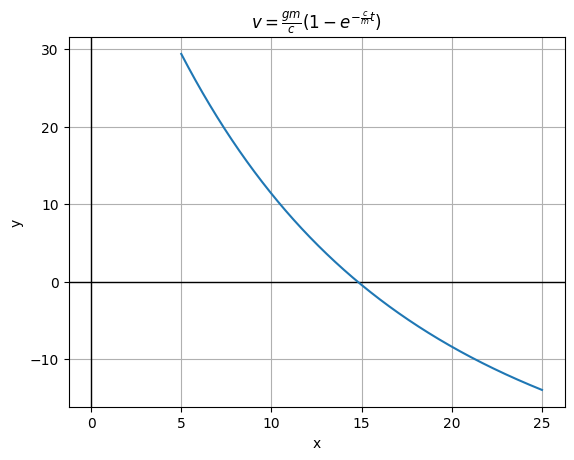

Корень = 14.7796630859375 - метод дихотомии
Корень = 14.78052727020241 - regula falsi
Корень = 14.780058348137036 - regula falsi modified

Количество итераций = 15 - метод дихотомии
Количество итераций = 10 - regula falsi
Количество итераций = 6 - regula falsi modified


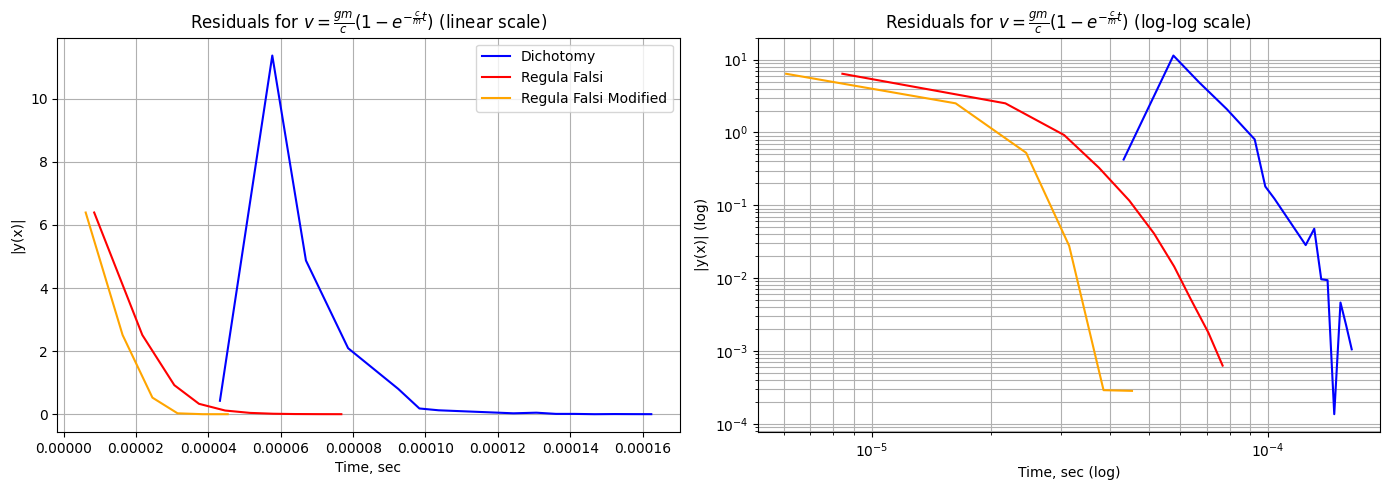

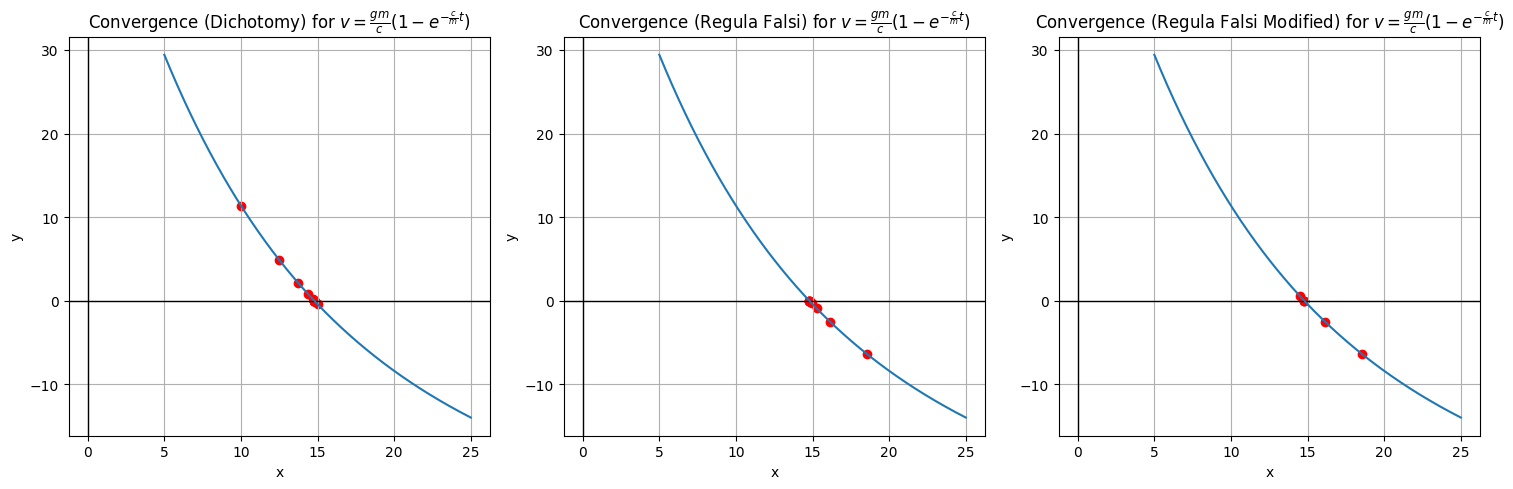

In [6]:
y = Function("$v = \\frac{gm}{c}(1 − e^{−\\frac{c}{m}t})$", lambda c: g*m/c*(1 - np.e ** (-c/m*t)) - v)
b = 25
a = 5
eps = 10**(-3)

test_methods(y, a, b, eps)

### Для уравнения: $x^3 + 0.0001 x - 0.0001 = 0$

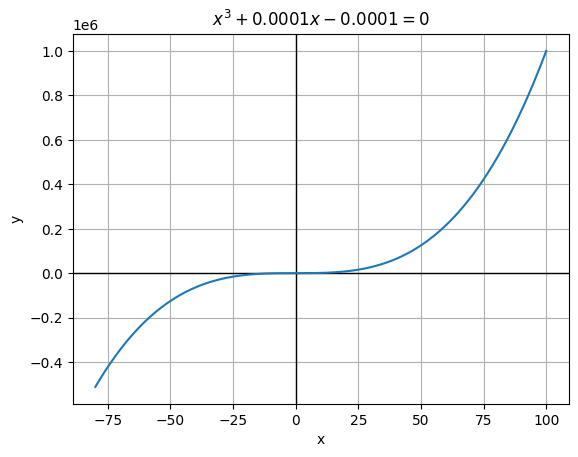

Корень = 0.045013427734375 - метод дихотомии
Корень = -2.137327761786821 - regula falsi
Корень = 0.045382084219788274 - regula falsi modified

Количество итераций = 18 - метод дихотомии
Количество итераций = 1039 - regula falsi
Количество итераций = 27 - regula falsi modified


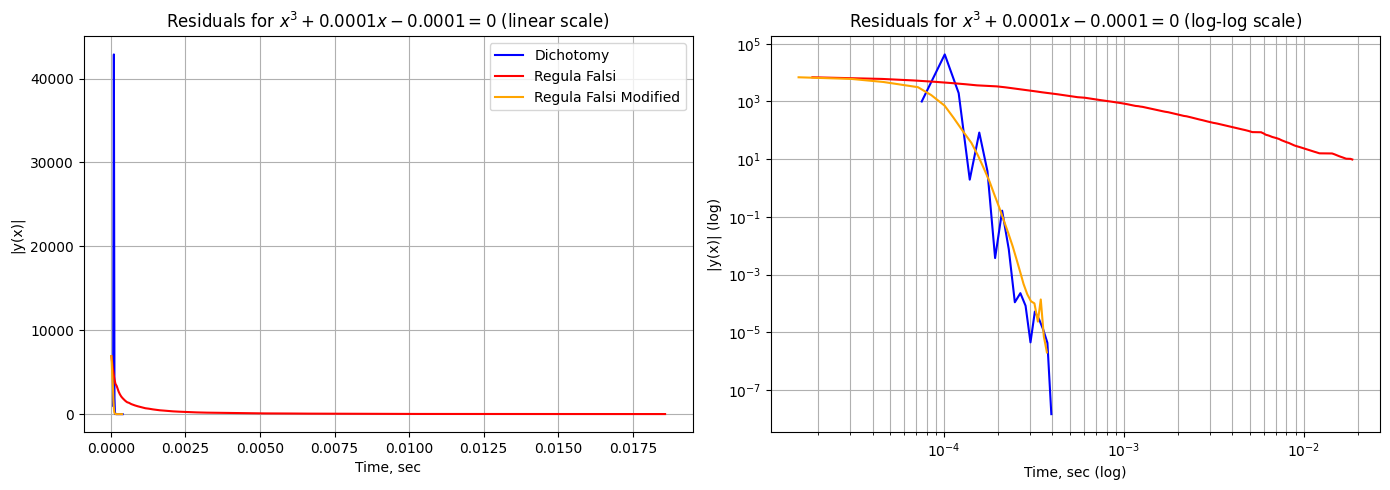

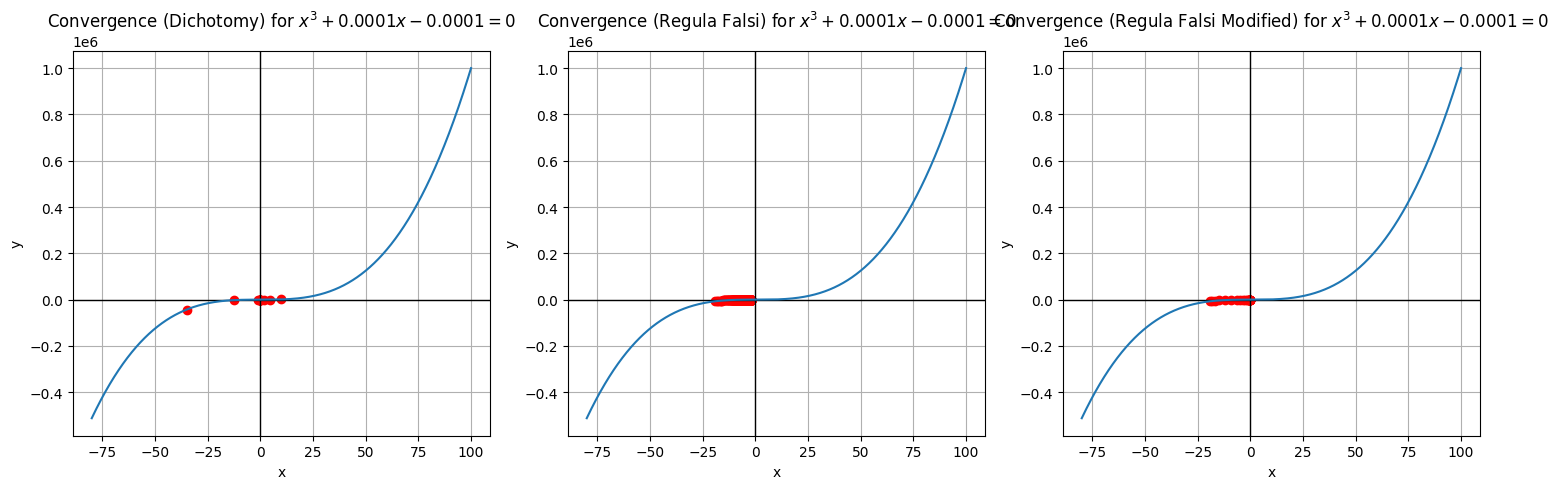

In [7]:
y = Function("$x^3 + 0.0001 x - 0.0001 = 0$", lambda x: x**3 + 0.0001 * x - 0.0001)
b = 100
a = -80
eps = 10**(-3)

test_methods(y, a, b, eps)

### Для уравнения: $0 = e^x -2$

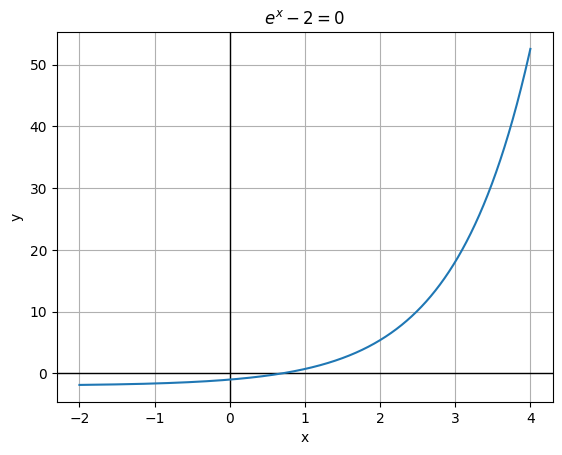

Корень = 0.693115234375 - метод дихотомии
Корень = 0.6863775455087269 - regula falsi
Корень = 0.6931471424602574 - regula falsi modified

Количество итераций = 13 - метод дихотомии
Количество итераций = 50 - regula falsi
Количество итераций = 11 - regula falsi modified


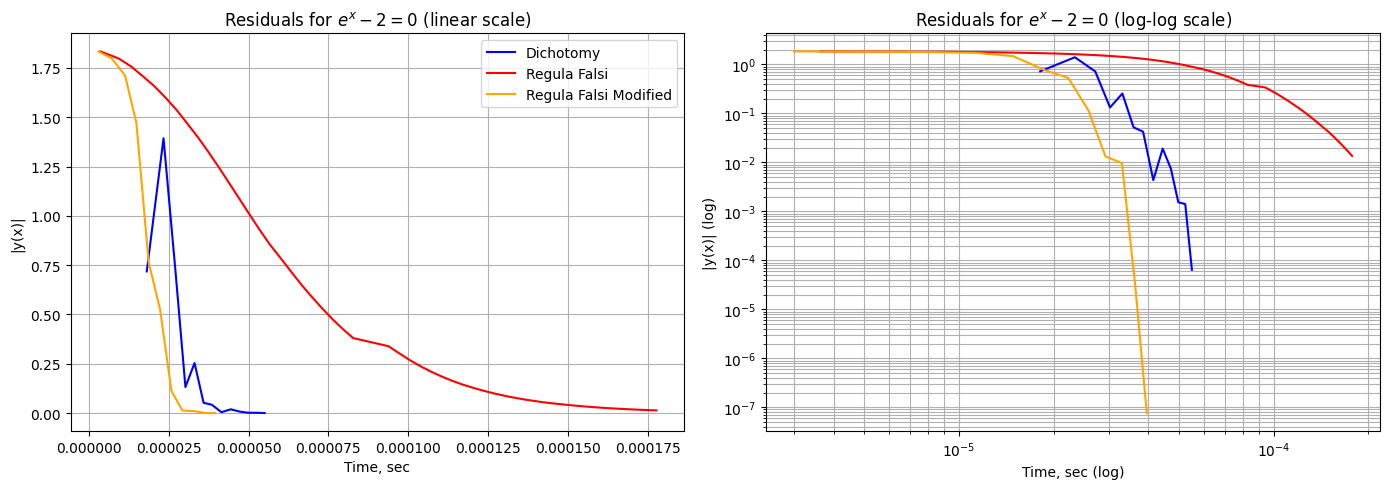

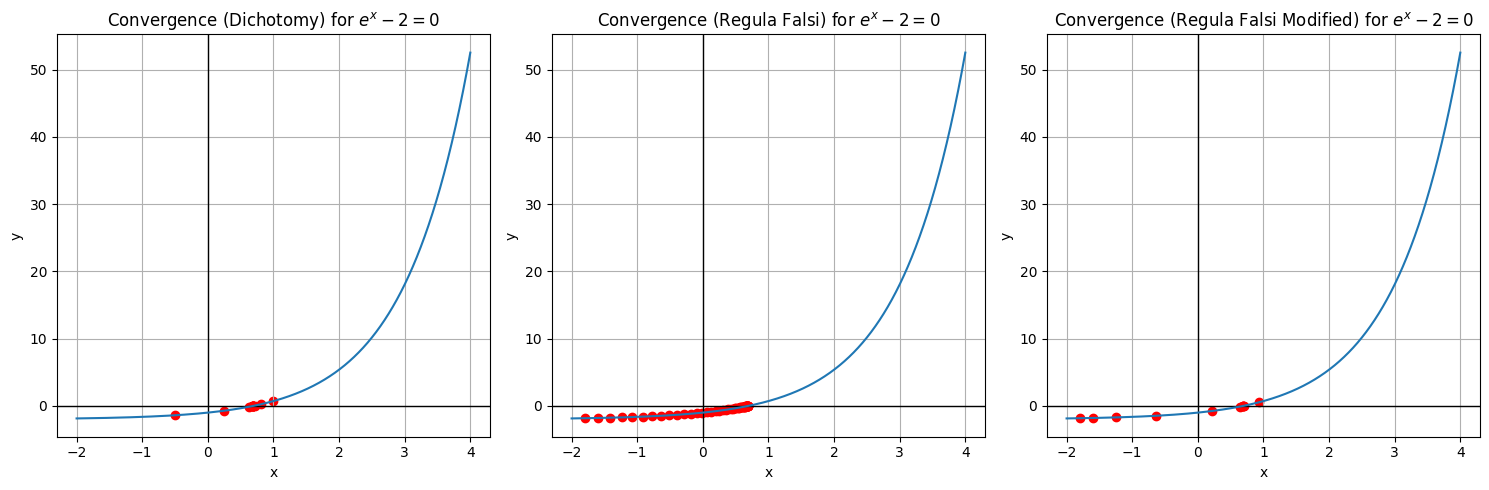

In [8]:
y = Function("$e^x - 2 = 0$", lambda x: np.e ** x -2)
b = 4
a = -2
eps = 10**(-3)

test_methods(y, a, b, eps)

## Условие задачи 2

## Задача 2.2

Используя **метод Ньютона**, *regula falsi*, **модифицированный regula falsi**, **метод секущих** и **метод Стеффенсена**, найти положительный корень уравнения:

$$
4(1 - x^2) - e^x = 0.
$$

Сравнить методы по скорости сходимости и количеству итераций.

Используя **метод Ньютона** и «**уточнённый**» метод Ньютона (при \( m = 2 \)), найти решение уравнения:

$$
x^2 e^x = 0
$$

при начальном приближении $x^{(0)} = 1$.  
Сравнить результаты и скорость сходимости.


In [2]:
y = Function("", lambda x: 4 * (1- x**2) - np.e ** x, lambda x: -8 * x- np.e**x)
b = 2
a = -2
eps = 10**(-3)

print(NewtonSolver(y, eps).solve(0.2).root)
print(SecantSolver(y, eps).solve(0.2, 0.5).root)
print(SteffensensSolver(y, eps).solve(0.2).root)



test_methods(y, a, b, eps)

0.703439571221629
0.7034395613294626
0.7034394686893736


NameError: name 'test_methods' is not defined